## Data Handling

In [1]:
import pandas as pd

In [2]:
#importing data
df=pd.read_fwf('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',header=None)
df.columns = ["Mpg","Cylinders","Displacement","Horsepower","Weight","Acceleration","Model year","Origin","Car name"]
# Displaying first five entries
df.head()

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model year,Origin,Car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


## Missing Values

In this dataset **missing values** are marked as **?** so we're going to replace the "?" with NaNs.

In [3]:
import numpy as np

# Converting "?" to NaNs
df = df.replace("?",np.NaN)

In [4]:
# Checking the fields which have missing values and the count of missing values in them
df.isna().sum()

Mpg             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model year      0
Origin          0
Car name        0
dtype: int64

Above result shows that the column **"Horsepower"** have 6 missing values.

In [5]:
# Converting the values of Horsepower column to numeric
df["Horsepower"] = pd.to_numeric(df["Horsepower"])
df["Horsepower"].dtype

dtype('float64')

#### Strategy 1: Given in Tutorial
Handling the missing values using the strategy given in tutorial

Approach 1: Filling the missing values in Horsepower column by median value

In [6]:
df_temp = df["Horsepower"]

print("Before filling missing values:\n")
print(df_temp[30:35])

df_temp = df_temp.fillna(df_temp.median())

print("\nAfter filling missing values:\n")
print(df_temp[30:35])

Before filling missing values:

30     90.0
31     95.0
32      NaN
33    100.0
34    105.0
Name: Horsepower, dtype: float64

After filling missing values:

30     90.0
31     95.0
32     93.5
33    100.0
34    105.0
Name: Horsepower, dtype: float64


Approach 2: Discarding the missing values

In [7]:
df_temp = df["Horsepower"]

print('\nNumber of rows in original data: %d' %(df.shape[0]))
df_temp = df_temp.dropna()
print('\nNumber of rows after dropping missing values: %d' %(df_temp.shape[0]))


Number of rows in original data: 398

Number of rows after dropping missing values: 392


### Strategy 2: Given on Kaggle tutorial
Now we are going to handle missing values using the methods given on the kaggle tutorial: https://www.kaggle.com/alexisbcook/missing-values/tutorial

We are directly moving to aproach 2 as approach 1 is already done in previous section

Approach 2: Imputing the missing values with the mean value of the column using simple imputor

In [8]:
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

df_temp=df.drop("Car name",axis=1)
print("\n before filling missing values:")
print(df_temp[30:35])
# df_temp.columns.values

#Initialising the imputer
myImputer = SimpleImputer(strategy='mean')

#Feature which contain missing values
numfeatures = ["Horsepower"]

imputer = ColumnTransformer([("myImputer",myImputer,numfeatures)])

filled_df = imputer.fit_transform(df_temp)
# filled_df
df_temp["Horsepower"] = pd.DataFrame(filled_df,columns=["Horsepower"])
print("\n After filling missing values:")
print(df_temp[30:35])


 before filling missing values:
     Mpg  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
30  28.0          4         140.0        90.0  2264.0          15.5   
31  25.0          4         113.0        95.0  2228.0          14.0   
32  25.0          4          98.0         NaN  2046.0          19.0   
33  19.0          6         232.0       100.0  2634.0          13.0   
34  16.0          6         225.0       105.0  3439.0          15.5   

    Model year  Origin  
30          71       1  
31          71       3  
32          71       1  
33          71       1  
34          71       1  

 After filling missing values:
     Mpg  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
30  28.0          4         140.0   90.000000  2264.0          15.5   
31  25.0          4         113.0   95.000000  2228.0          14.0   
32  25.0          4          98.0  104.469388  2046.0          19.0   
33  19.0          6         232.0  100.000000  2634.0          13.0   
34 

**Approach 3:** In this approach, we impute the missing values, as before. And, additionally, for each column with missing entries in the original dataset, we add a new column that shows the location of the imputed entries.

In [9]:
# Taking fresh data with missing values
df_temp=df.drop("Car name",axis=1)

# Adding a was_missing column if the column contains missing values
for label,content in df_temp.items():
    if pd.isna(content).sum():
        df_temp[label+"_was_missing"] = pd.isna(content)

print("\n before filling missing values:")
print(df_temp[30:35])
# df_temp.columns.values

#Initialising the imputer
myImputer = SimpleImputer(strategy='mean')

#Feature which contain missing values
numfeatures = ["Horsepower"]

imputer = ColumnTransformer([("myImputer",myImputer,numfeatures)])

filled_df = imputer.fit_transform(df_temp)
# filled_df
df_temp["Horsepower"] = pd.DataFrame(filled_df,columns=["Horsepower"])
print("\n After filling missing values:")
print(df_temp[30:35])


 before filling missing values:
     Mpg  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
30  28.0          4         140.0        90.0  2264.0          15.5   
31  25.0          4         113.0        95.0  2228.0          14.0   
32  25.0          4          98.0         NaN  2046.0          19.0   
33  19.0          6         232.0       100.0  2634.0          13.0   
34  16.0          6         225.0       105.0  3439.0          15.5   

    Model year  Origin  Horsepower_was_missing  
30          71       1                   False  
31          71       3                   False  
32          71       1                    True  
33          71       1                   False  
34          71       1                   False  

 After filling missing values:
     Mpg  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
30  28.0          4         140.0   90.000000  2264.0          15.5   
31  25.0          4         113.0   95.000000  2228.0          14.0   
3

### Using Scikit-learn

#### Nearest neighbors imputation

In [10]:
from sklearn.impute import KNNImputer

np.random.seed(42)

df_temp=df.drop("Car name",axis=1)
print("\n before filling missing values:")
print(df_temp[30:35])

# Initialising the KNNImputer
imputer = KNNImputer(n_neighbors=2,weights="uniform")
# Fitting the model
df_transformed = imputer.fit_transform(df_temp)

df_temp = pd.DataFrame(df_transformed,columns=df_temp.columns.values)
print("\n After filling missing values:")
print(df_temp[30:35])


 before filling missing values:
     Mpg  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
30  28.0          4         140.0        90.0  2264.0          15.5   
31  25.0          4         113.0        95.0  2228.0          14.0   
32  25.0          4          98.0         NaN  2046.0          19.0   
33  19.0          6         232.0       100.0  2634.0          13.0   
34  16.0          6         225.0       105.0  3439.0          15.5   

    Model year  Origin  
30          71       1  
31          71       3  
32          71       1  
33          71       1  
34          71       1  

 After filling missing values:
     Mpg  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
30  28.0        4.0         140.0        90.0  2264.0          15.5   
31  25.0        4.0         113.0        95.0  2228.0          14.0   
32  25.0        4.0          98.0        65.5  2046.0          19.0   
33  19.0        6.0         232.0       100.0  2634.0          13.0   
34 

### Strandization and Normalization

#### A. Strategy given in Tutorial

**Outliers**

<AxesSubplot:>

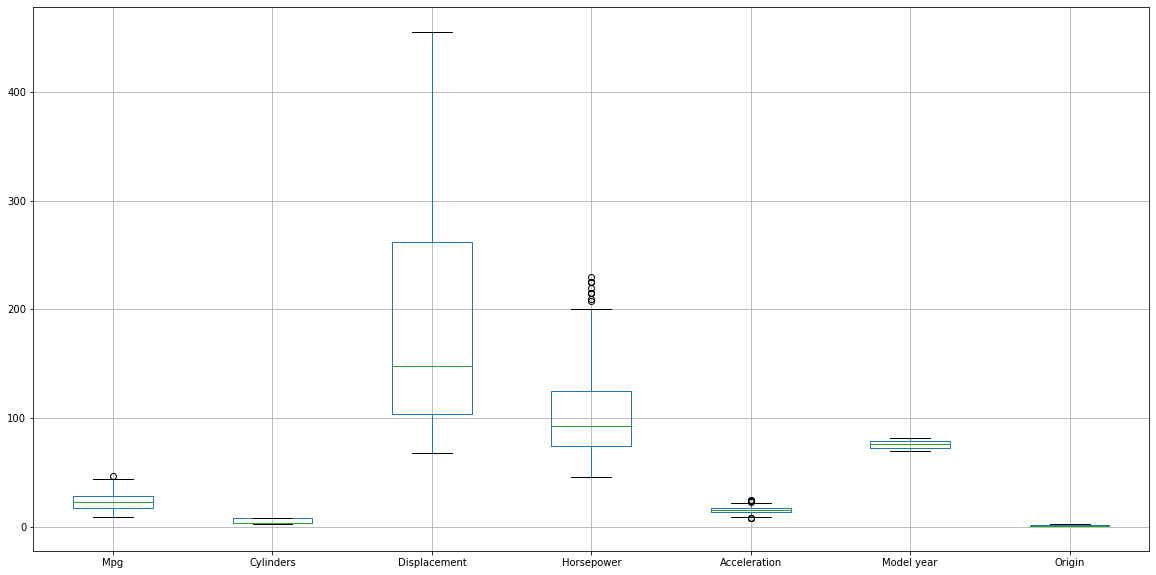

In [11]:
import matplotlib
%matplotlib inline

df_temp2 = df_temp.drop("Weight",axis=1)
df_temp2.boxplot(figsize=(20,10))

The boxplot suggest that only 3 fields(MPG, Horsepower and acceleration) contain abnormally high values. So we're going to calculate the Z-score of each attribute and remove those instances with abnormally high and low Z-scores.

In [12]:
Z = (df_temp2-df_temp2.mean())/df_temp2.std()
Z[20:25]

,Mpg,Cylinders,Displacement,Horsepower,Acceleration,Model year,Origin
20,0.190050,-0.855244,-0.800096,-0.445236,0.700554,-1.625381,0.532552
21,0.062107,-0.855244,-0.828867,-0.367075,-0.387314,-1.625381,0.532552
22,0.190050,-0.855244,-0.857639,-0.236807,0.700554,-1.625381,0.532552
23,0.317993,-0.855244,-0.694600,0.232159,-1.112559,-1.625381,0.532552
24,-0.321722,0.320532,0.053459,-0.367075,-0.206002,-1.625381,-0.714246


In [13]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

#Discarding the instances with Z-score<=-1 and Z-score>=3
z2 = Z.loc[((Z>-3).sum(axis=1)==7) & ((Z<3).sum(axis=1)==7),:]

print('Number of rows after discarding missing values = %d' % (z2.shape[0]))

Number of rows before discarding outliers = 398
Number of rows after discarding missing values = 391


### B. Using Scikit-learn
**Mapping to a Uniform distribution**

`QuantileTransformer` provides a non-parametric transformation to map the data to a uniform distribution with values between 0 and 1:

In [14]:
from sklearn.preprocessing import QuantileTransformer

print("\nBefore Transformation:")
print(df_temp[30:35])

# Instantiating the model
quantileTransformer = QuantileTransformer(random_state=42,n_quantiles=50)

# Fitting the model
df_transformed = quantileTransformer.fit_transform(df_temp)

df_temp2 = pd.DataFrame(df_transformed,columns=df_temp.columns.values)
print("\nAfter Transformation:")
print(df_temp2[30:35])


Before Transformation:
     Mpg  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
30  28.0        4.0         140.0        90.0  2264.0          15.5   
31  25.0        4.0         113.0        95.0  2228.0          14.0   
32  25.0        4.0          98.0        65.5  2046.0          19.0   
33  19.0        6.0         232.0       100.0  2634.0          13.0   
34  16.0        6.0         225.0       105.0  3439.0          15.5   

    Model year  Origin  
30        71.0     1.0  
31        71.0     3.0  
32        71.0     1.0  
33        71.0     1.0  
34        71.0     1.0  

After Transformation:
         Mpg  Cylinders  Displacement  Horsepower    Weight  Acceleration  \
30  0.714286   0.265306      0.459184    0.459184  0.274476      0.510204   
31  0.591837   0.265306      0.311224    0.520408  0.250604      0.275510   
32  0.591837   0.265306      0.214286    0.088389  0.125586      0.887755   
33  0.346939   0.642857      0.673469    0.602041  0.428095      0.1

### Discretization


70.0    29
71.0    28
72.0    28
73.0    40
74.0    27
75.0    30
76.0    34
77.0    28
78.0    36
79.0    29
80.0    29
81.0    29
82.0    31
Name: Model year, dtype: int64

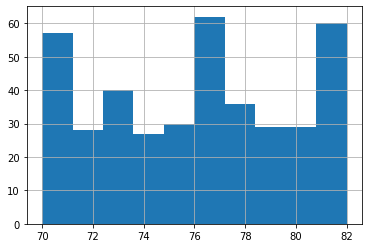

In [25]:
# Plotting the histogram to see the distribution of Model Year
df_temp["Model year"].hist(bins=10)
df_temp["Model year"].value_counts(sort=False)

First we are going to divide model year in 5 intervals.

In [33]:
bins = pd.cut(df_temp["Model year"],5)
bins.value_counts(sort=False)

(69.988, 72.4]    85
(72.4, 74.8]      67
(74.8, 77.2]      92
(77.2, 79.6]      65
(79.6, 82.0]      89
Name: Model year, dtype: int64

To divide the model year attribute in equal frequency intervals we are going to use `qcut` method

In [34]:
bins = pd.qcut(df_temp["Model year"],5)
bins.value_counts(sort=False)

(69.999, 72.0]    85
(72.0, 75.0]      97
(75.0, 77.0]      62
(77.0, 80.0]      94
(80.0, 82.0]      60
Name: Model year, dtype: int64

#### Using Scikit-Learn
We are going to use `KBinsDiscretizer`

In [79]:
# Importing KBinsDiscretizer
from sklearn.preprocessing import KBinsDiscretizer

# establishing random seed
np.random.seed(42)

# Instantiating the model
enc = KBinsDiscretizer(n_bins=10,strategy="uniform",encode="ordinal")

# Transforming the Displacement column
data_temp = df_temp["Displacement"].to_numpy().reshape(len(df_temp["Displacement"]),1)
transformed = enc.fit_transform(data_temp)
data_temp = pd.DataFrame(transformed)
data_temp.value_counts(sort=False)

0.0    107
1.0     89
2.0     31
3.0     13
4.0     57
5.0      3
6.0     42
7.0     31
8.0     16
9.0      9
dtype: int64